In [603]:
%matplotlib inline
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import log10
import scipy

# CLEANUP SECTION

In [604]:
# Reads csv file to dataframe
#usvideos = pd.read_csv("USvideos.csv")
#category = pd.read_csv("categories.csv")
#frvideos = pd.read_csv("./FRvideos.csv")
#USmerged_file = pd.merge(usvideos,category,how="left",on="category_id")
#FRmerged_file = pd.merge(frvideos,category,how="left",on="category_id")
#USmerged_file.to_csv("Youtube_cleanfile.csv")
#FRmerged_file.to_csv("FranceYoutube_cleanfile.csv")

In [605]:
#Reads cleaned up filesC:\Users\skavy\Documents\FranceYoutube_cleanfile.csv
US_clean_file = pd.read_csv("USYoutube_cleanfile.csv")
FR_clean_file = pd.read_csv("FranceYoutube_cleanfile.csv")

In [606]:
# dropped columns that are not required from US and FRANCE youtube files
organized_US = US_clean_file[["publish_time","trending_date","video_id","title","channel_title", \
                            "category_id","Category Name","views","likes","dislikes","comment_count"]]
organized_FR = FR_clean_file[["publish_time","trending_date","video_id","title","channel_title", \
                            "category_id","Category Name","views","likes","dislikes","comment_count"]]
organized_US.head()

publish_time trending_date     video_id  \
0  2017-11-13T17:13:01.000Z      17.14.11  2kyS6SvSYSE   
1  2017-11-13T07:30:00.000Z      17.14.11  1ZAPwfrtAFY   
2  2017-11-12T19:05:24.000Z      17.14.11  5qpjK5DgCt4   
3  2017-11-13T11:00:04.000Z      17.14.11  puqaWrEC7tY   
4  2017-11-12T18:01:41.000Z      17.14.11  d380meD0W0M   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id   Category Name    views   likes  dislikes  comment_count  
0           22  People & Blogs   748374   57527      2966          15954  
1           24   Entertainment  2418783   97185      6146          12703  
2           23          Comedy  3191434  146033      5339           8181  
3           24   Entertainment   343168   10172       666           2146  
4           24   Entertainment  2095731  132235      1989          17518

# US Analysis By Category - Likes,Views,Comments & Trending count

In [607]:
#Grouped by category and video_id for getting likes of each video at the last day of trending
US_likes = organized_US.groupby(["Category Name","video_id"])["likes"].last()
USlikes_category = pd.DataFrame(US_likes.groupby("Category Name").sum())

#Grouped by category and video_id for getting dislikes of each video at the last day of trending
US_dislikes = organized_US.groupby(["Category Name","video_id"])["dislikes"].last()
USdislikes_category = pd.DataFrame(US_dislikes.groupby("Category Name").sum())

#Gets views on the last day of Trending
US_views = organized_US.groupby(["Category Name","video_id"])["views"].last()
USviews_category = pd.DataFrame(US_views.groupby("Category Name").sum())

#Gets Comment_count on the last day of trending
US_comment_count = organized_US.groupby(["Category Name","video_id"])["comment_count"].last()
UScomment_category = pd.DataFrame(US_comment_count.groupby("Category Name").sum())

#Gets Video Trending Analysis
trending_df = organized_US.groupby(["Category Name","video_id"])["trending_date"].count().reset_index()
US_trending = trending_df.groupby("Category Name")["trending_date"].sum().reset_index()
US_trending_count = US_trending.rename(index=str,columns={"trending_date":"trending_count"})


In [608]:
#Creates a new dataframe for top categories
USnewDF = pd.DataFrame()
USnewDF["Categories"] = USviews_category.index.values
USnewDF["Views"] = USviews_category.views.values
USnewDF["Likes"] = USlikes_category.likes.values
USnewDF["Dislikes"] = USdislikes_category.dislikes.values
USnewDF["Comments"] = UScomment_category.comment_count.values
USnewDF["Trending_count"] = US_trending_count.trending_count.values
USnewDF

Categories       Views      Likes  Dislikes  Comments  \
0            Entertainment  2828454026   67435707   6730531   9899166   
1         Autos & Vehicles   102913586     730306     46397    123347   
2                   Comedy   777588476   30219555   1076667   3013141   
3                Education   152579019    5402061    189946    634097   
4         Film & Animation   814584061   16684422    686181   1956237   
5                   Gaming   239483937    6991366    624992   1386717   
6           How-to & Style   557195961   20646615    705387   2894804   
7                    Music  4828174140  150641673   5264504  12865088   
8          News & Politics   234030841    3026635    772357   1087653   
9   Non-profits & Activism    31064609    2388624    563262    740432   
10          People & Blogs   670079573   23023627   1379082   3055820   
11          Pets & Animals   104212968    2670957     67902    359329   
12    Science & Technology   428430317   10165998    547989   1391115   
13                   Shows     3049600      61741      1451      6085   
14                  Sports   641054451   12606962    797782   1491921   
15         Travel & Events    58840828     587696     39341    105703   

    Trending_count  
0             9964  
1              384  
2             3457  
3             1656  
4             2345  
5              817  
6             4146  
7             6472  
8             2487  
9               57  
10            3210  
11             920  
12            2401  
13              57  
14            2174  
15             402

# US TOP TRENDED CATEGORIES - CHARTS

In [609]:
#gets top categories with greater than 250M views
UShigher_views = USnewDF.query("Views >= 250000000")
#Gets likes for Top categories
UShigher_likes = USnewDF.query("Views >= 250000000")
#Gets dislikes for Top categories
UShigher_dislikes = USnewDF.query("Views >= 250000000")
#Gets comment count Top categories
UShigher_comments = USnewDF.query("Views >= 250000000")
#Gets trending days count for Top categories
higher_trending = USnewDF.query("Views >= 250000000")

In [610]:
#Creates a new dataframe for top categories
Top_USnewDF = pd.DataFrame()
Top_USnewDF["Categories"] = UShigher_views.Categories.values
Top_USnewDF["Views"] = UShigher_views.Views.values
Top_USnewDF["Likes"] = UShigher_likes.Likes.values
Top_USnewDF["Dislikes"] = UShigher_dislikes.Dislikes.values
Top_USnewDF["Comments"] = UShigher_comments.Comments.values
Top_USnewDF["Trending_count"] = higher_trending.Trending_count.values
Top_USnewDF

Categories       Views      Likes  Dislikes  Comments  \
0         Entertainment  2828454026   67435707   6730531   9899166   
1                Comedy   777588476   30219555   1076667   3013141   
2      Film & Animation   814584061   16684422    686181   1956237   
3        How-to & Style   557195961   20646615    705387   2894804   
4                 Music  4828174140  150641673   5264504  12865088   
5        People & Blogs   670079573   23023627   1379082   3055820   
6  Science & Technology   428430317   10165998    547989   1391115   
7                Sports   641054451   12606962    797782   1491921   

   Trending_count  
0            9964  
1            3457  
2            2345  
3            4146  
4            6472  
5            3210  
6            2401  
7            2174

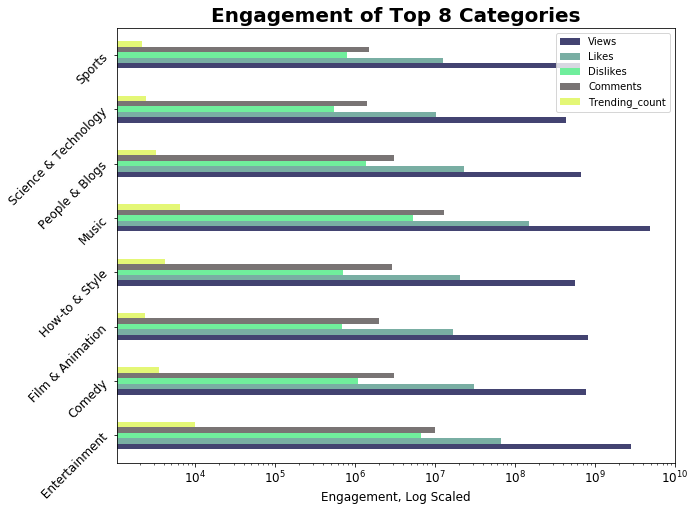

In [611]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Top_USnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Top 8 Categories',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Top_USnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("USengagement_Top_Categories.png")

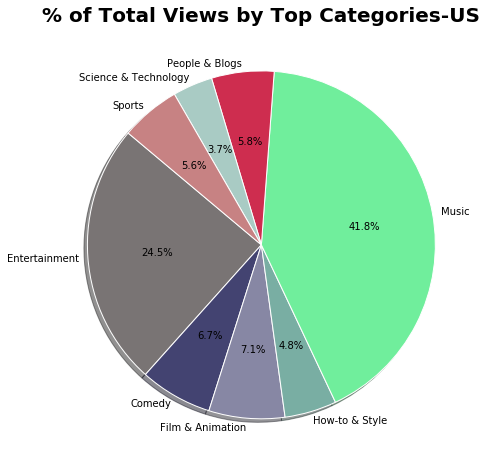

In [612]:
#Percent Views
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Entertainment','Comedy','Film & Animation','How-to & Style','Music','People & Blogs','Science & Technology','Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Top Categories-US", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("US_percent_views__Top_Categories.png")
 # Show Figure
plt.show()

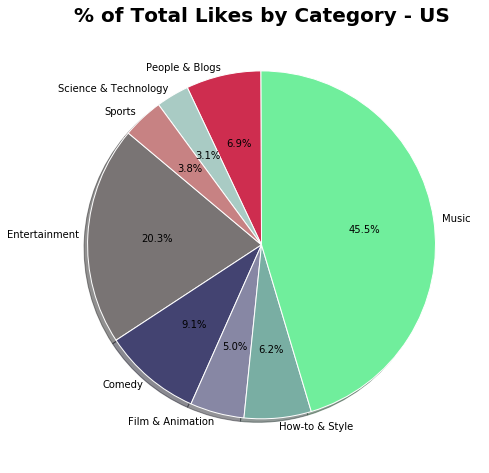

In [613]:
#Percent Likes
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Likes
types = 'Entertainment', 'Comedy', 'Film & Animation', 'How-to & Style', 'Music', 'People & Blogs', 'Science & Technology', 'Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Likes_Top_Categories.png")
 # Show Figure
plt.show()

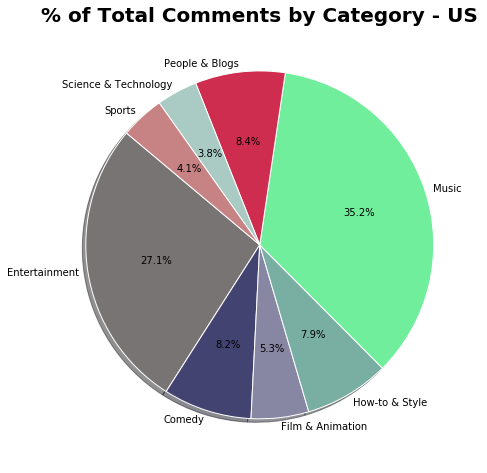

In [614]:
#Percent Comments
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Comments
types = 'Entertainment','Comedy','Film & Animation','How-to & Style','Music','People & Blogs','Science & Technology','Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("USpercent_Comments_Top_Categories.png")
 # Show Figure
plt.show()

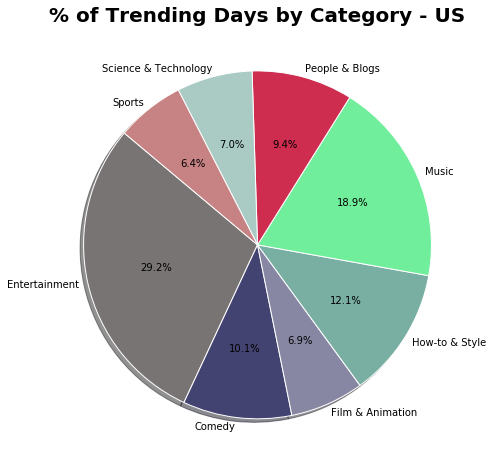

In [615]:
# percent of Trending
percs = Top_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Trending_count
types = 'Entertainment', 'Comedy', 'Film & Animation', 'How-to & Style', 'Music', 'People & Blogs', 'Science & Technology', 'Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Category - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Trending_Top_Categories.png")
 # Show Figure
plt.show()

# US LESS TRENDED CATEGORIES - CHARTS

In [616]:
#gets categories with less than 250M views
USless_views = USnewDF.query("Views < 250000000")
#Gets likes for least Categories
USless_likes = USnewDF.query("Views < 250000000")
#Gets dislikes for least Categories
USless_dislikes = USnewDF.query("Views < 250000000")
#Gets comment count for least Categories
USless_comments = USnewDF.query("Views < 250000000")
#Gets trending days count for least Categories
USless_trending = USnewDF.query("Views < 250000000")

In [617]:
#Creates a new dataframe for least categories
Last_USnewDF = pd.DataFrame()
Last_USnewDF["Categories"] = USless_views.Categories.values
Last_USnewDF["Views"] = USless_views.Views.values
Last_USnewDF["Likes"] = USless_likes.Likes.values
Last_USnewDF["Dislikes"] = USless_dislikes.Dislikes.values
Last_USnewDF["Comments"] = USless_comments.Comments.values
Last_USnewDF["Trending_count"] = USless_trending.Trending_count.values
Last_USnewDF


Categories      Views    Likes  Dislikes  Comments  \
0        Autos & Vehicles  102913586   730306     46397    123347   
1               Education  152579019  5402061    189946    634097   
2                  Gaming  239483937  6991366    624992   1386717   
3         News & Politics  234030841  3026635    772357   1087653   
4  Non-profits & Activism   31064609  2388624    563262    740432   
5          Pets & Animals  104212968  2670957     67902    359329   
6                   Shows    3049600    61741      1451      6085   
7         Travel & Events   58840828   587696     39341    105703   

   Trending_count  
0             384  
1            1656  
2             817  
3            2487  
4              57  
5             920  
6              57  
7             402

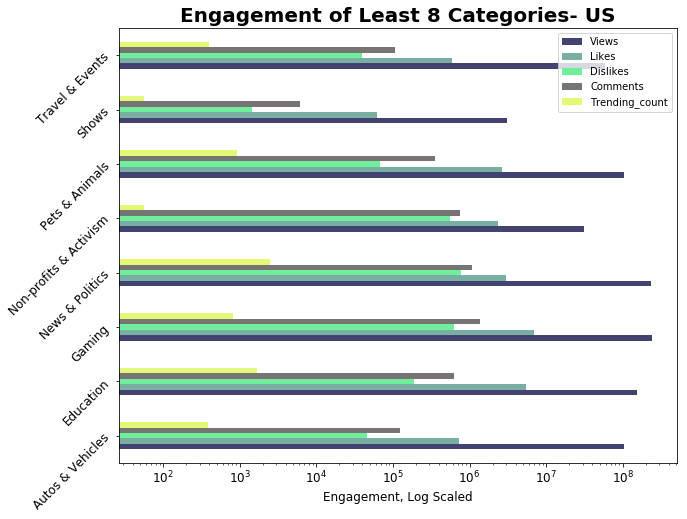

In [618]:
#Horizontal Bar Chart of Engagement for Bottom Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Last_USnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Least 8 Categories- US',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Last_USnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("USengagement_Least_categories.png")

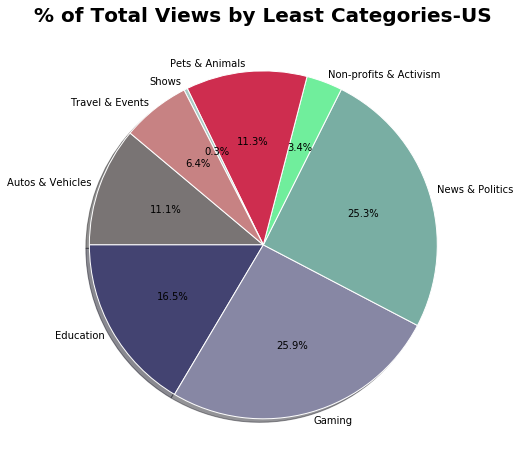

In [619]:
#Percent Views
percs = Last_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Least Categories-US", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("US_percent_views_Least_categories.png")
 # Show Figure
plt.show()

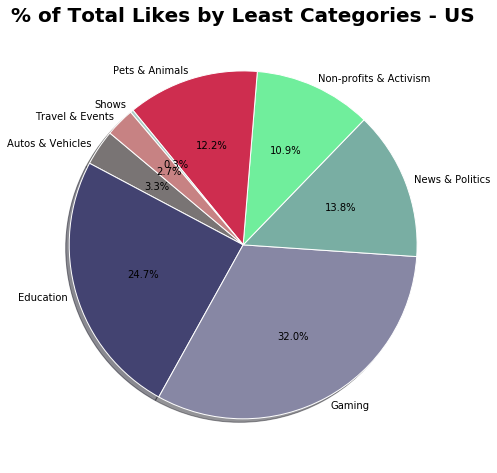

In [620]:
#Percent Likes
percs = Last_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Likes
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Least Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Likes_Least_categories.png")
 # Show Figure
plt.show()

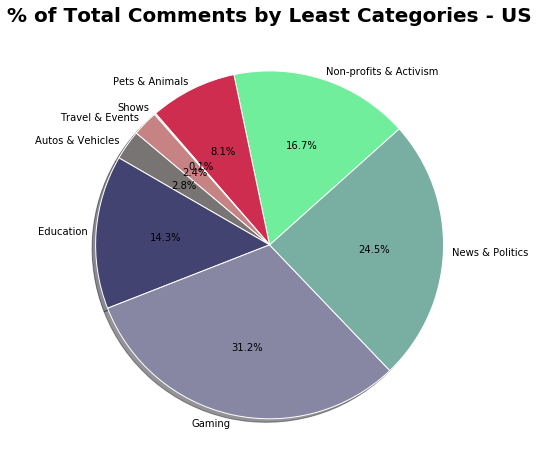

In [621]:
#Percent Comments
percs = Last_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Comments
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Least Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Comments_Least_categories.png")
 # Show Figure
plt.show()

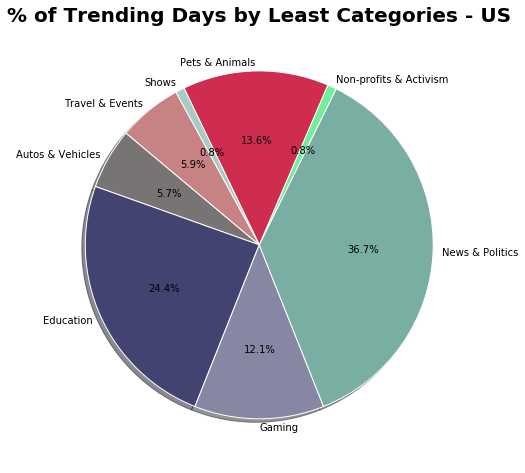

In [622]:
# percent of Trending
percs = Last_USnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']
# Build Pie Chart
slices = percs.Trending_count
types = 'Autos & Vehicles','Education','Gaming','News & Politics','Non-profits & Activism','Pets & Animals','Shows','Travel & Events'
plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Least Categories - US", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("US_percent_Trending_Least_categories.png")
 # Show Figure
plt.show()

# France Analysis By Category - Likes,Views,Comments & Trending count

In [623]:
#Grouped by category and video_id for getting likes of each video at the last day of trending
FR_likes = organized_FR.groupby(["Category Name","video_id"])["likes"].last()
FRlikes_category = pd.DataFrame(FR_likes.groupby("Category Name").sum())
FRlikes_category.sort_values(by= "likes",ascending=True)

#Grouped by category and video_id for getting dislikes of each video at the last day of trending
FR_dislikes = organized_FR.groupby(["Category Name","video_id"])["dislikes"].last()
FRdislikes_category = pd.DataFrame(FR_dislikes.groupby("Category Name").sum())
FRdislikes_category.sort_values(by= "dislikes",ascending=True)

#Gets views on the last day of Trnding
FR_views = organized_FR.groupby(["Category Name","video_id"])["views"].last()
FRviews_category = pd.DataFrame(FR_views.groupby("Category Name").sum())
FRviews_category.sort_values(by= "views",ascending=True)

#Gets Comment_count on the last day of trending
FR_comment_count = organized_FR.groupby(["Category Name","video_id"])["comment_count"].last()
FRcomment_category = pd.DataFrame(FR_comment_count.groupby("Category Name").sum())
FRcomment_category.sort_values(by= "comment_count",ascending=True)

#Gets Video Trending Analysis
Ftrending_df = organized_FR.groupby(["Category Name","video_id"])["trending_date"].count().reset_index()
FR_trending = Ftrending_df.groupby("Category Name")["trending_date"].sum().reset_index()
FR_trending_count = FR_trending.rename(index=str,columns={"trending_date":"trending_count"})



In [624]:
#Creates a new dataframe for top categories
FRnewDF = pd.DataFrame()
FRnewDF["Categories"] = FRviews_category.index.values
FRnewDF["Views"] = FRviews_category.views.values
FRnewDF["Likes"] = FRlikes_category.likes.values
FRnewDF["Dislikes"] = FRdislikes_category.dislikes.values
FRnewDF["Comments"] = FRcomment_category.comment_count.values
FRnewDF["Trending_count"] = FR_trending_count.trending_count.values
FRnewDF

Categories       Views      Likes  Dislikes  Comments  \
0            Entertainment  2621401132   71000558   5294387   9104781   
1         Autos & Vehicles    36047867    1165235     42325    151952   
2                   Comedy   969170576   54150058   1558423   4175303   
3                Education    72929026    4751087    123788    468013   
4         Film & Animation   598656251   14130217    677501   1742424   
5                   Gaming   267149796   13085230    686982   1776471   
6           How-to & Style   344267251   10467818    447318   1149019   
7                   Movies     1011413      24050      1034      1429   
8                    Music  2705575176  137154736   4907431  12532032   
9          News & Politics   365736377    5660456    589439   1327472   
10  Non-profits & Activism    34605887    3179996    746744    918604   
11          People & Blogs   887398517   20373154   1215512   2891912   
12          Pets & Animals    32050554     977830     30369    160940   
13    Science & Technology   215729325    8303932    263900   1246133   
14                   Shows    50268539     282317    100505     43385   
15                  Sports  1373022249   24565598   1320690   2740328   
16                Trailers        9804        138         9         0   
17         Travel & Events     5293612     324068      7071     46060   

    Trending_count  
0             9819  
1              673  
2             4343  
3              769  
4             2157  
5             1459  
6             2361  
7               11  
8             3946  
9             3752  
10             114  
11            5719  
12             237  
13             802  
14              99  
15            4342  
16               2  
17             119

# FRANCE TOP TRENDED CATEGORIES - CHARTS

In [625]:
#gets top categories with greater than 8M likes
FRhigher_likes = FRnewDF.query("Views >= 250000000")
#gets top categories with greater than 8M likes
FRhigher_dislikes = FRnewDF.query("Views >= 250000000")
#gets top categories with greater than 250M views
FRhigher_views = FRnewDF.query("Views >= 250000000")
#gets top categories with greater than 1.39M comments
FRhigher_comments = FRnewDF.query("Views >= 250000000")
#gets top categories that trended more than 2250 times
FRhigher_trending = FRnewDF.query("Views >= 250000000")

In [626]:
#Creates a new dataframe for top categories
Top_FRnewDF = pd.DataFrame()
Top_FRnewDF["Categories"] = FRhigher_views.Categories.values
Top_FRnewDF["Views"] = FRhigher_views.Views.values
Top_FRnewDF["Likes"] = FRhigher_likes.Likes.values
Top_FRnewDF["Dislikes"] = FRhigher_dislikes.Dislikes.values
Top_FRnewDF["Comments"] = FRhigher_comments.Comments.values
Top_FRnewDF["Trending_count"] = FRhigher_trending.Trending_count.values

Top_FRnewDF

Categories       Views      Likes  Dislikes  Comments  Trending_count
0     Entertainment  2621401132   71000558   5294387   9104781            9819
1            Comedy   969170576   54150058   1558423   4175303            4343
2  Film & Animation   598656251   14130217    677501   1742424            2157
3            Gaming   267149796   13085230    686982   1776471            1459
4    How-to & Style   344267251   10467818    447318   1149019            2361
5             Music  2705575176  137154736   4907431  12532032            3946
6   News & Politics   365736377    5660456    589439   1327472            3752
7    People & Blogs   887398517   20373154   1215512   2891912            5719
8            Sports  1373022249   24565598   1320690   2740328            4342

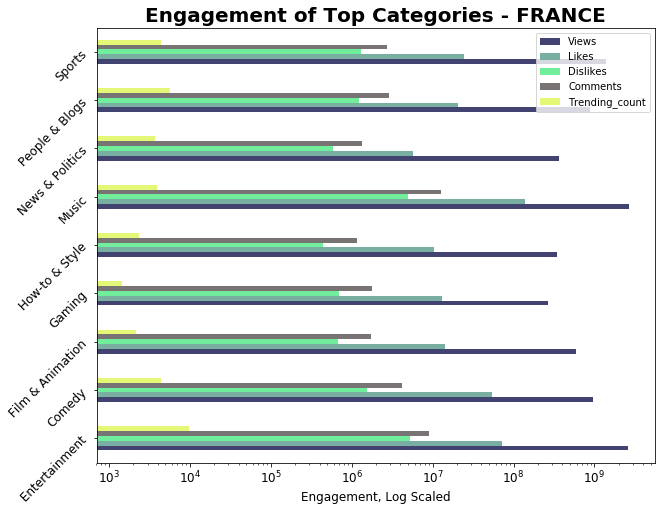

In [627]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Top_FRnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Top Categories - FRANCE',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Top_FRnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("FRengagement_Top_Categories.png")

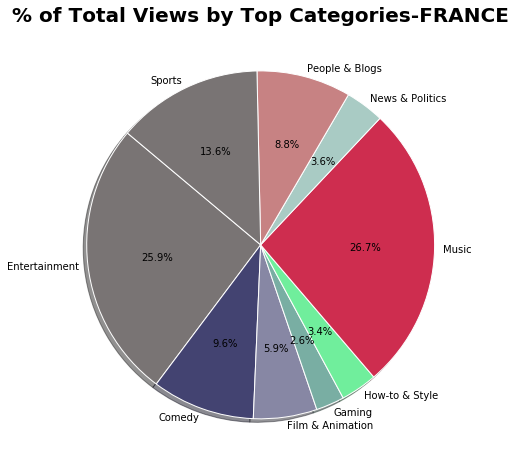

In [628]:
#Percent Views
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283']

# Build Pie Chart
slices = percs.Views
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Top Categories-FRANCE", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("FR_percent_views_Top_Categories.png")
 # Show Figure
plt.show()

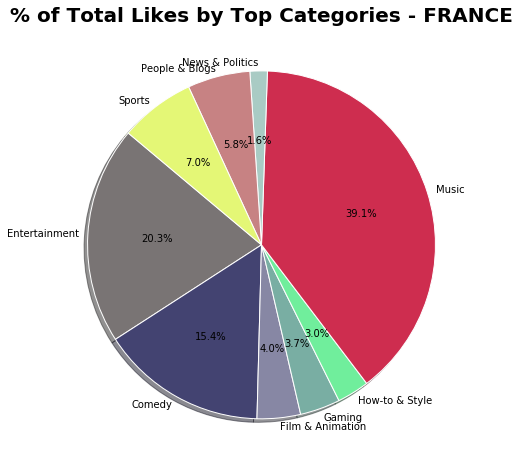

In [629]:
#Percent Likes
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Likes
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Top Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Likes_Top_Categories.png")
 # Show Figure
plt.show()

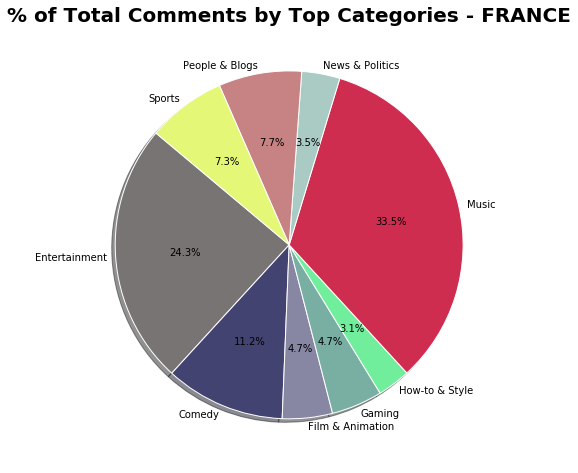

In [630]:
#Percent Comments
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Comments
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Top Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Comments_Top_Categories.png")
 # Show Figure
plt.show()

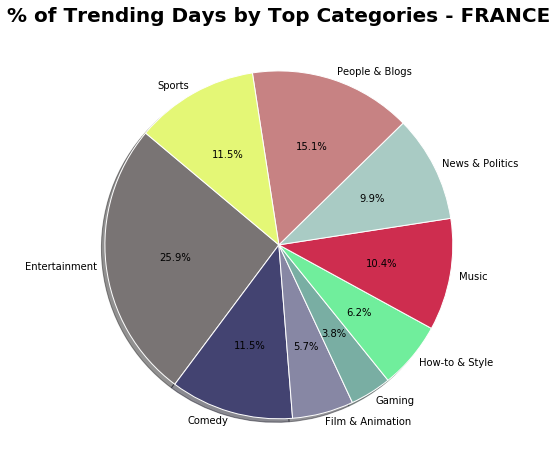

In [631]:
# percent of Trending
percs = Top_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Trending_count
types = 'Entertainment','Comedy','Film & Animation','Gaming','How-to & Style','Music','News & Politics','People & Blogs','Sports'
plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Top Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_percent_Trending_Top_Categories.png")
 # Show Figure
plt.show()

# FRANCE LOW TRENDED CATEGORIES - CHARTS

In [632]:
#gets top categories with greater than 8M likes
FRlow_likes = FRnewDF.query("Views < 250000000")
#gets top categories with greater than 8M likes
FRlow_dislikes = FRnewDF.query("Views < 250000000")
#gets top categories with greater than 250M views
FRlow_views = FRnewDF.query("Views < 250000000")
#gets top categories with greater than 1.39M comments
FRlow_comments = FRnewDF.query("Views < 250000000")
#gets top categories that trended more than 2250 times
FRlow_trending = FRnewDF.query("Views < 250000000")

In [633]:
#Creates a new dataframe for top categories
Low_FRnewDF = pd.DataFrame()
Low_FRnewDF["Categories"] = FRlow_views.Categories.values
Low_FRnewDF["Views"] = FRlow_views.Views.values
Low_FRnewDF["Likes"] = FRlow_likes.Likes.values
Low_FRnewDF["Dislikes"] = FRlow_dislikes.Dislikes.values
Low_FRnewDF["Comments"] = FRlow_comments.Comments.values
Low_FRnewDF["Trending_count"] = FRlow_trending.Trending_count.values

Low_FRnewDF

Categories      Views    Likes  Dislikes  Comments  \
0        Autos & Vehicles   36047867  1165235     42325    151952   
1               Education   72929026  4751087    123788    468013   
2                  Movies    1011413    24050      1034      1429   
3  Non-profits & Activism   34605887  3179996    746744    918604   
4          Pets & Animals   32050554   977830     30369    160940   
5    Science & Technology  215729325  8303932    263900   1246133   
6                   Shows   50268539   282317    100505     43385   
7                Trailers       9804      138         9         0   
8         Travel & Events    5293612   324068      7071     46060   

   Trending_count  
0             673  
1             769  
2              11  
3             114  
4             237  
5             802  
6              99  
7               2  
8             119

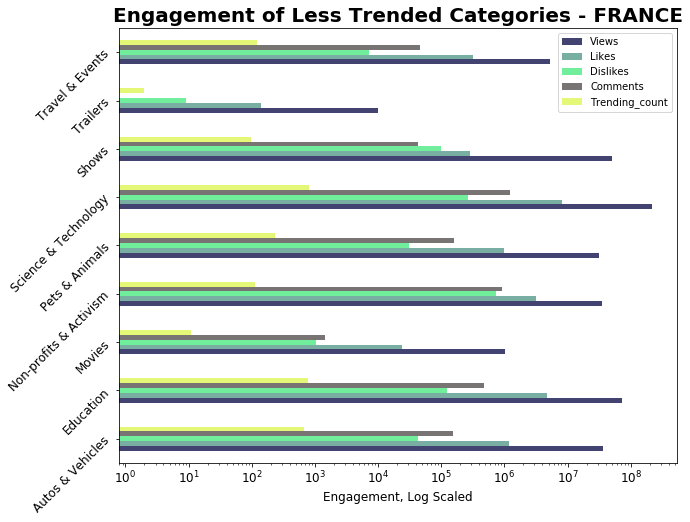

In [634]:
#Horizontal Bar Chart of Engagement for Top 8 Categories
my_colors=['#434371', '#79aea3', '#70ee9c' ,'#797474','#E4F776']
ax=Low_FRnewDF.plot(kind="barh",figsize=(10,8),legend=True, fontsize=12, color=my_colors, logx=True)
ax.set_title('Engagement of Less Trended Categories - FRANCE',fontsize= 20, fontweight="bold")
ax.set_yticklabels(Low_FRnewDF.Categories, rotation=45)
ax.set_xlabel("Engagement, Log Scaled",fontsize=12)
#Save figure
plt.savefig("FR_engagement_Least_categories.png")

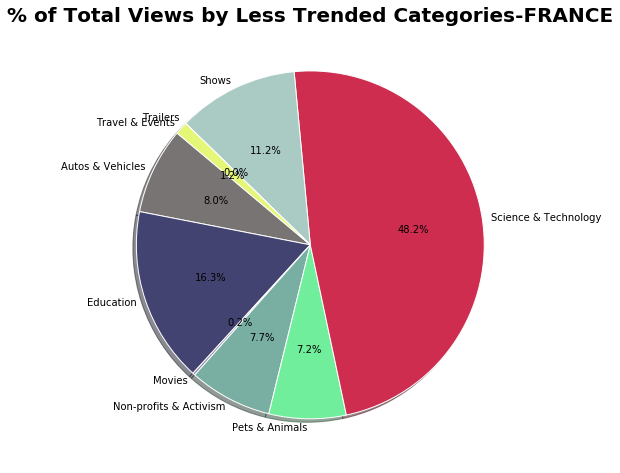

In [635]:
#Percent Views
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']

# Build Pie Chart
slices = percs.Views
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'

plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Views by Less Trended Categories-FRANCE", fontweight="bold", fontsize= 20)
#Save Figure
plt.savefig("FR_percent_views_Least_categories.png")
 # Show Figure
plt.show()

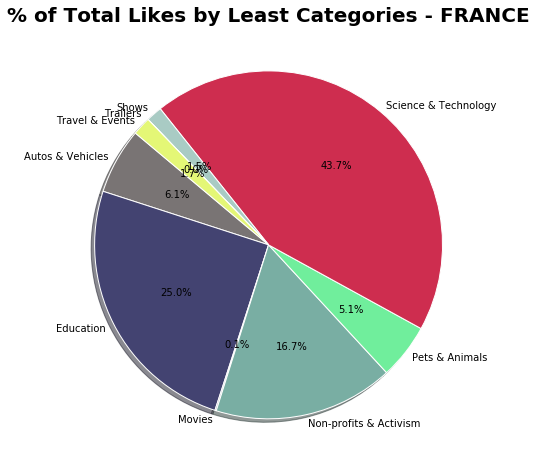

In [636]:
#Percent Likes
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Likes
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'


plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Likes by Least Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FRpercent_Likes_Least_categories.png")
 # Show Figure
plt.show()

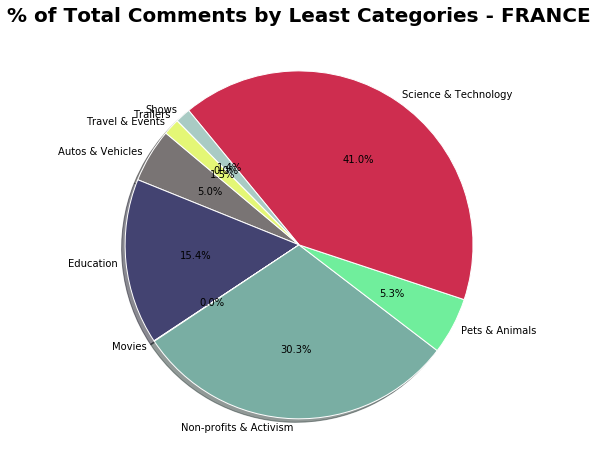

In [637]:
#Percent Comments
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Comments
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'
plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Total Comments by Least Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_percent_Comments_Least_categories.png")
 # Show Figure
plt.show()

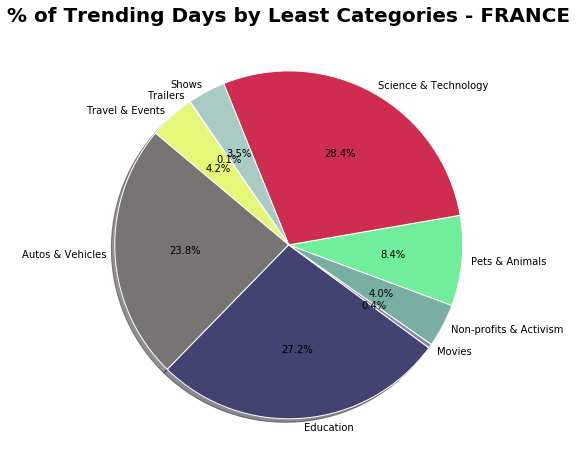

In [638]:
# percent of Trending
percs = Low_FRnewDF.iloc[:, 1:].apply(lambda x: x / x.sum())
my_colors2=['#797474', '#434371', "#8787a4", '#79aea3', '#70ee9c', '#ce2d4f', '#a9cbc4', '#c78283','#E4F776']
# Build Pie Chart
slices = percs.Trending_count
types = 'Autos & Vehicles','Education','Movies','Non-profits & Activism','Pets & Animals','Science & Technology','Shows','Trailers','Travel & Events'
plt.figure(figsize=(12,8))
wedges, _, autotexts = plt.pie(slices, labels=types, labeldistance=1.05, colors=my_colors2,shadow=True,autopct='%1.1f%%',startangle=140)
for autotext in autotexts:
    autotext.set_color('black')
    
for pie_wedge in wedges:
    pie_wedge.set_edgecolor('white')
    
plt.title("% of Trending Days by Least Categories - FRANCE", fontweight="bold", fontsize= 20)
# Save Figure
plt.savefig("FR_percent_Trending_Least_categories.png")
 # Show Figure
plt.show()

In [639]:
# Creates a new Dataframe with both countries' Top Categories together 
Top_USnewDF["Country"] = "United States"
Top_FRnewDF["Country"] = "France"
Top_Categories = Top_USnewDF.append(Top_FRnewDF,ignore_index=True)
Top_Categories

Categories       Views      Likes  Dislikes  Comments  \
0          Entertainment  2828454026   67435707   6730531   9899166   
1                 Comedy   777588476   30219555   1076667   3013141   
2       Film & Animation   814584061   16684422    686181   1956237   
3         How-to & Style   557195961   20646615    705387   2894804   
4                  Music  4828174140  150641673   5264504  12865088   
5         People & Blogs   670079573   23023627   1379082   3055820   
6   Science & Technology   428430317   10165998    547989   1391115   
7                 Sports   641054451   12606962    797782   1491921   
8          Entertainment  2621401132   71000558   5294387   9104781   
9                 Comedy   969170576   54150058   1558423   4175303   
10      Film & Animation   598656251   14130217    677501   1742424   
11                Gaming   267149796   13085230    686982   1776471   
12        How-to & Style   344267251   10467818    447318   1149019   
13                 Music  2705575176  137154736   4907431  12532032   
14       News & Politics   365736377    5660456    589439   1327472   
15        People & Blogs   887398517   20373154   1215512   2891912   
16                Sports  1373022249   24565598   1320690   2740328   

    Trending_count        Country  
0             9964  United States  
1             3457  United States  
2             2345  United States  
3             4146  United States  
4             6472  United States  
5             3210  United States  
6             2401  United States  
7             2174  United States  
8             9819         France  
9             4343         France  
10            2157         France  
11            1459         France  
12            2361         France  
13            3946         France  
14            3752         France  
15            5719         France  
16            4342         France

In [640]:
# Creates a new Dataframe with both countries' Least Categories together 
Last_USnewDF["Country"] = "United States"
Low_FRnewDF["Country"] = "France"
Least_categories = Last_USnewDF.append(Low_FRnewDF,ignore_index=True)
Least_categories

Categories      Views    Likes  Dislikes  Comments  \
0         Autos & Vehicles  102913586   730306     46397    123347   
1                Education  152579019  5402061    189946    634097   
2                   Gaming  239483937  6991366    624992   1386717   
3          News & Politics  234030841  3026635    772357   1087653   
4   Non-profits & Activism   31064609  2388624    563262    740432   
5           Pets & Animals  104212968  2670957     67902    359329   
6                    Shows    3049600    61741      1451      6085   
7          Travel & Events   58840828   587696     39341    105703   
8         Autos & Vehicles   36047867  1165235     42325    151952   
9                Education   72929026  4751087    123788    468013   
10                  Movies    1011413    24050      1034      1429   
11  Non-profits & Activism   34605887  3179996    746744    918604   
12          Pets & Animals   32050554   977830     30369    160940   
13    Science & Technology  215729325  8303932    263900   1246133   
14                   Shows   50268539   282317    100505     43385   
15                Trailers       9804      138         9         0   
16         Travel & Events    5293612   324068      7071     46060   

    Trending_count        Country  
0              384  United States  
1             1656  United States  
2              817  United States  
3             2487  United States  
4               57  United States  
5              920  United States  
6               57  United States  
7              402  United States  
8              673         France  
9              769         France  
10              11         France  
11             114         France  
12             237         France  
13             802         France  
14              99         France  
15               2         France  
16             119         France

# T-test and p-value

In [641]:
(t_stat, p) = stats.ttest_ind(Top_Categories["Likes"], Least_categories["Likes"], equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is 3.5492496085180427.
p-value is 0.0026461438608014376.


# Correlation coefficient and p-value with scipy

In [642]:
#r lies between -1 and 1, r more closer to 1 determines the strong correlation
(r, p) = scipy.stats.pearsonr(Top_Categories["Likes"],Top_Categories["Comments"])
print("Pearson’s correlation coefficient is {}.".format(r))
print("2-tailed p-value is {}.".format(p))

Pearson’s correlation coefficient is 0.9626171332580902.
2-tailed p-value is 6.494068113583815e-10.


In [643]:
Top_Categories.corr()

Views     Likes  Dislikes  Comments  Trending_count
Views           1.000000  0.923245  0.895820  0.942399        0.694191
Likes           0.923245  1.000000  0.828975  0.962617        0.516245
Dislikes        0.895820  0.828975  1.000000  0.943615        0.835913
Comments        0.942399  0.962617  0.943615  1.000000        0.690617
Trending_count  0.694191  0.516245  0.835913  0.690617        1.000000